In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv(r'C:\Users\panda\Downloads\SEM3\Data science\tips (data for regression problem).csv')

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['tip'])
y = df_encoded['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train[['total_bill', 'size']] = scaler.fit_transform(X_train[['total_bill', 'size']])
X_test[['total_bill', 'size']] = scaler.transform(X_test[['total_bill', 'size']])

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Support Vector Regression': SVR(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Train, evaluate, and gather results
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Display evaluation results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n", results_df)

# Identify significant factors using feature importance
# Linear models have coefficients; Tree-based models have feature importances
feature_importance = {}
for model_name, model in models.items():
    if hasattr(model, 'coef_'):  # For linear models
        importance = model.coef_
        feature_importance[model_name] = dict(zip(X.columns, importance))
    elif hasattr(model, 'feature_importances_'):  # For tree-based models
        importance = model.feature_importances_
        feature_importance[model_name] = dict(zip(X.columns, importance))

# Display feature importance for each model
print("\nFeature Importance for each model:\n")
for model_name, importance in feature_importance.items():
    print(f"{model_name} Feature Importance:")
    sorted_importance = dict(sorted(importance.items(), key=lambda item: abs(item[1]), reverse=True))
    for feature, value in sorted_importance.items():
        print(f"{feature}: {value:.4f}")
    print("\n")

# Provide actionable insights based on model results
print("Actionable Insights for Management:")
print("- Identify key factors (e.g., total bill, time, day) that significantly impact tip amounts.")
print("- If certain times or days yield higher tips, consider adjusting staffing or promotions.")
print("- For factors like 'smoker' or 'size', explore policies or arrangements that maximize customer satisfaction and tips.")'''


Model Evaluation Results:
                                 MAE       MSE        R2
Linear Regression          0.667133  0.703357  0.437302
Ridge Regression           0.666859  0.700651  0.439466
Lasso Regression           0.654809  0.612210  0.510221
Decision Tree              0.829592  1.255194 -0.004178
Random Forest              0.752882  0.918199  0.265424
Support Vector Regression  0.648318  0.652107  0.478302
K-Nearest Neighbors        0.708653  0.804866  0.356092


'# Identify significant factors using feature importance\n# Linear models have coefficients; Tree-based models have feature importances\nfeature_importance = {}\nfor model_name, model in models.items():\n    if hasattr(model, \'coef_\'):  # For linear models\n        importance = model.coef_\n        feature_importance[model_name] = dict(zip(X.columns, importance))\n    elif hasattr(model, \'feature_importances_\'):  # For tree-based models\n        importance = model.feature_importances_\n        feature_importance[model_name] = dict(zip(X.columns, importance))\n\n# Display feature importance for each model\nprint("\nFeature Importance for each model:\n")\nfor model_name, importance in feature_importance.items():\n    print(f"{model_name} Feature Importance:")\n    sorted_importance = dict(sorted(importance.items(), key=lambda item: abs(item[1]), reverse=True))\n    for feature, value in sorted_importance.items():\n        print(f"{feature}: {value:.4f}")\n    print("\n")\n\n# Provide

In [6]:
# Identify significant factors using feature importance
# Linear models have coefficients; Tree-based models have feature importances
feature_importance = {}
for model_name, model in models.items():
    if hasattr(model, 'coef_'):  # For linear models
        importance = model.coef_
        feature_importance[model_name] = dict(zip(X.columns, importance))
    elif hasattr(model, 'feature_importances_'):  # For tree-based models
        importance = model.feature_importances_
        feature_importance[model_name] = dict(zip(X.columns, importance))

# Display feature importance for each model
# Display feature importance for each model
print("\nFeature Importance for each model:\n")
for model_name, importance in feature_importance.items():
    print(f"{model_name} Feature Importance:")
    sorted_importance = dict(sorted(importance.items(), key=lambda item: abs(item[1]) if np.isscalar(item[1]) else abs(item[1][0]), reverse=True))
    for feature, value in sorted_importance.items():
        # Check if the value is a scalar or an array, and handle formatting accordingly
        if np.isscalar(value):
            print(f"{feature}: {value:.4f}")
        else:  # If it's an array, print the first element (for models with multi-dimensional output)
            print(f"{feature}: {value[0]:.4f}")
    print("\n")


# Provide actionable insights based on model results
print("Actionable Insights for Management:")
print("- Identify key factors (e.g., total bill, time, day) that significantly impact tip amounts.")
print("- If certain times or days yield higher tips, consider adjusting staffing or promotions.")
print("- For factors like 'smoker' or 'size', explore policies or arrangements that maximize customer satisfaction and tips.")


Feature Importance for each model:

Linear Regression Feature Importance:
total_bill: 0.8284
size: 0.2191
smoker_Yes: -0.1924
day_Sat: -0.1858
day_Thur: -0.1797
time_Lunch: 0.0950
day_Sun: -0.0508
sex_Male: 0.0288


Ridge Regression Feature Importance:
total_bill: 0.8212
size: 0.2214
smoker_Yes: -0.1820
day_Sat: -0.1670
day_Thur: -0.1404
time_Lunch: 0.0738
day_Sun: -0.0322
sex_Male: 0.0283


Lasso Regression Feature Importance:
total_bill: 0.7312
size: 0.1848
sex_Male: 0.0000
smoker_Yes: -0.0000
day_Sat: -0.0000
day_Sun: 0.0000
day_Thur: -0.0000
time_Lunch: -0.0000


Decision Tree Feature Importance:
total_bill: 0.7802
smoker_Yes: 0.0613
size: 0.0521
day_Sat: 0.0304
day_Sun: 0.0271
sex_Male: 0.0266
day_Thur: 0.0177
time_Lunch: 0.0046


Random Forest Feature Importance:
total_bill: 0.7670
smoker_Yes: 0.0694
size: 0.0580
day_Sat: 0.0303
day_Sun: 0.0252
sex_Male: 0.0252
time_Lunch: 0.0130
day_Thur: 0.0118


Support Vector Regression Feature Importance:
total_bill: 0.8604


Actionable Ins

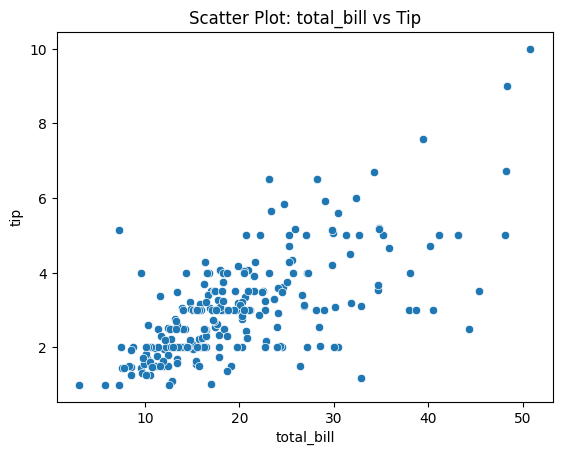

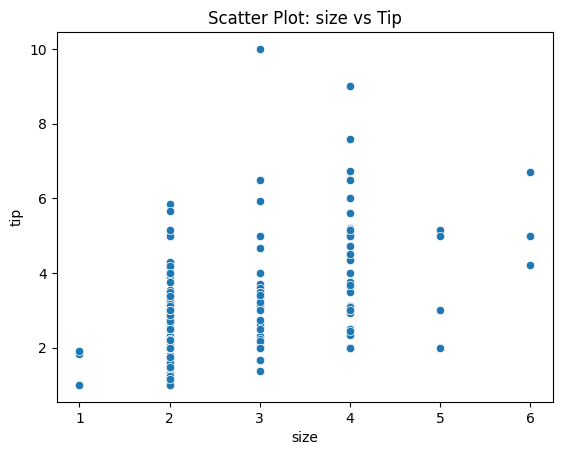

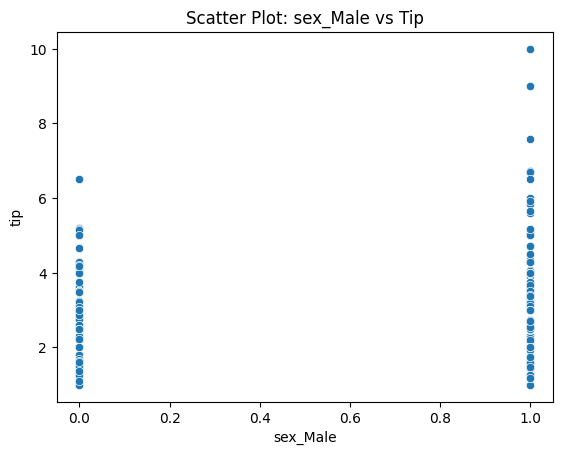

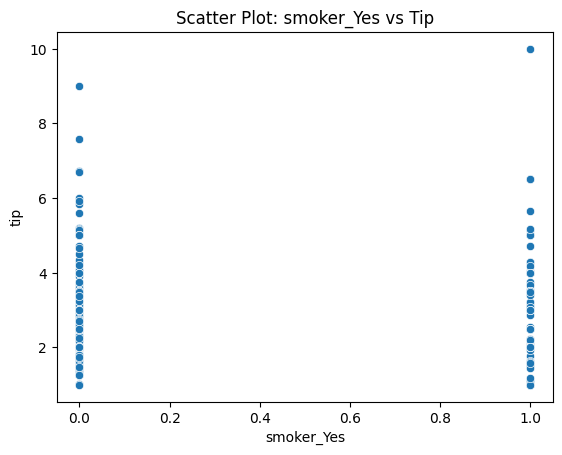

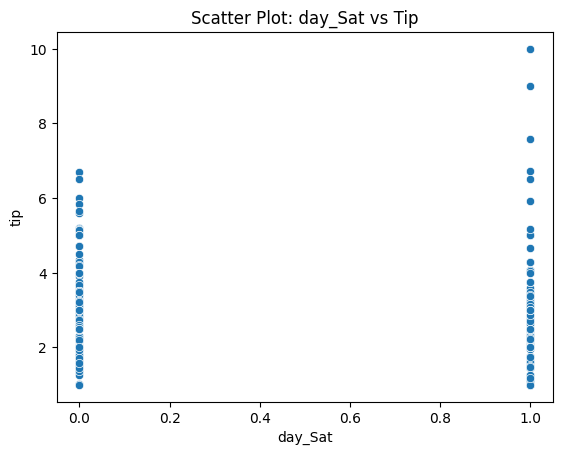

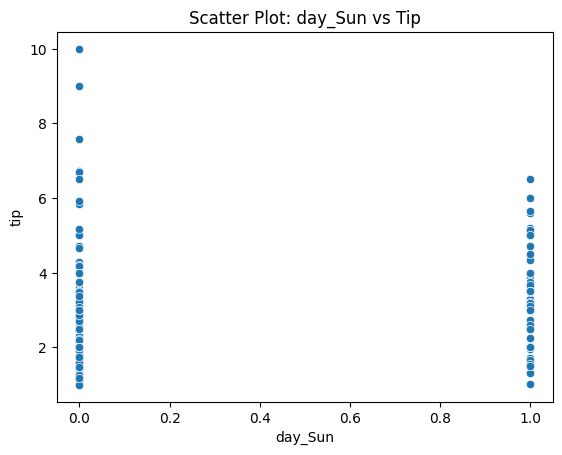

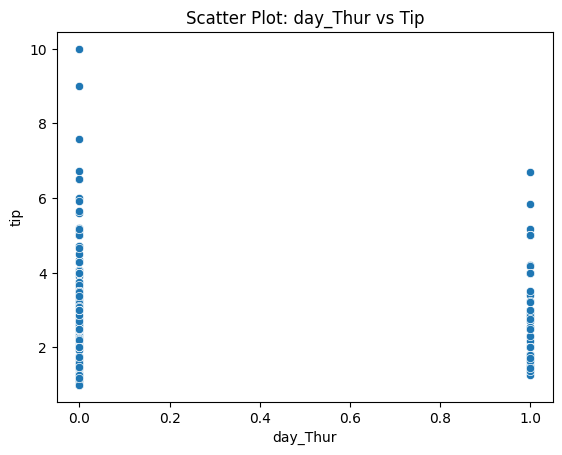

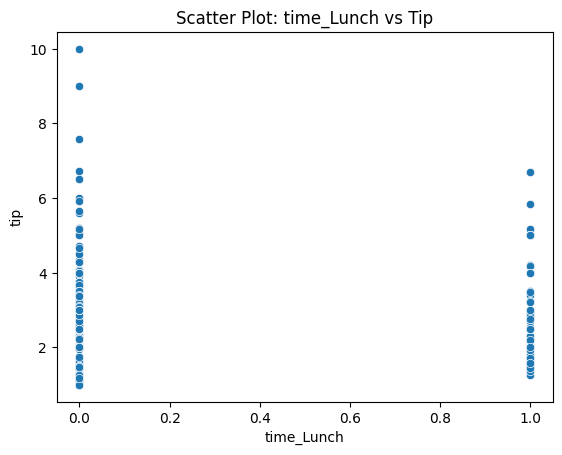

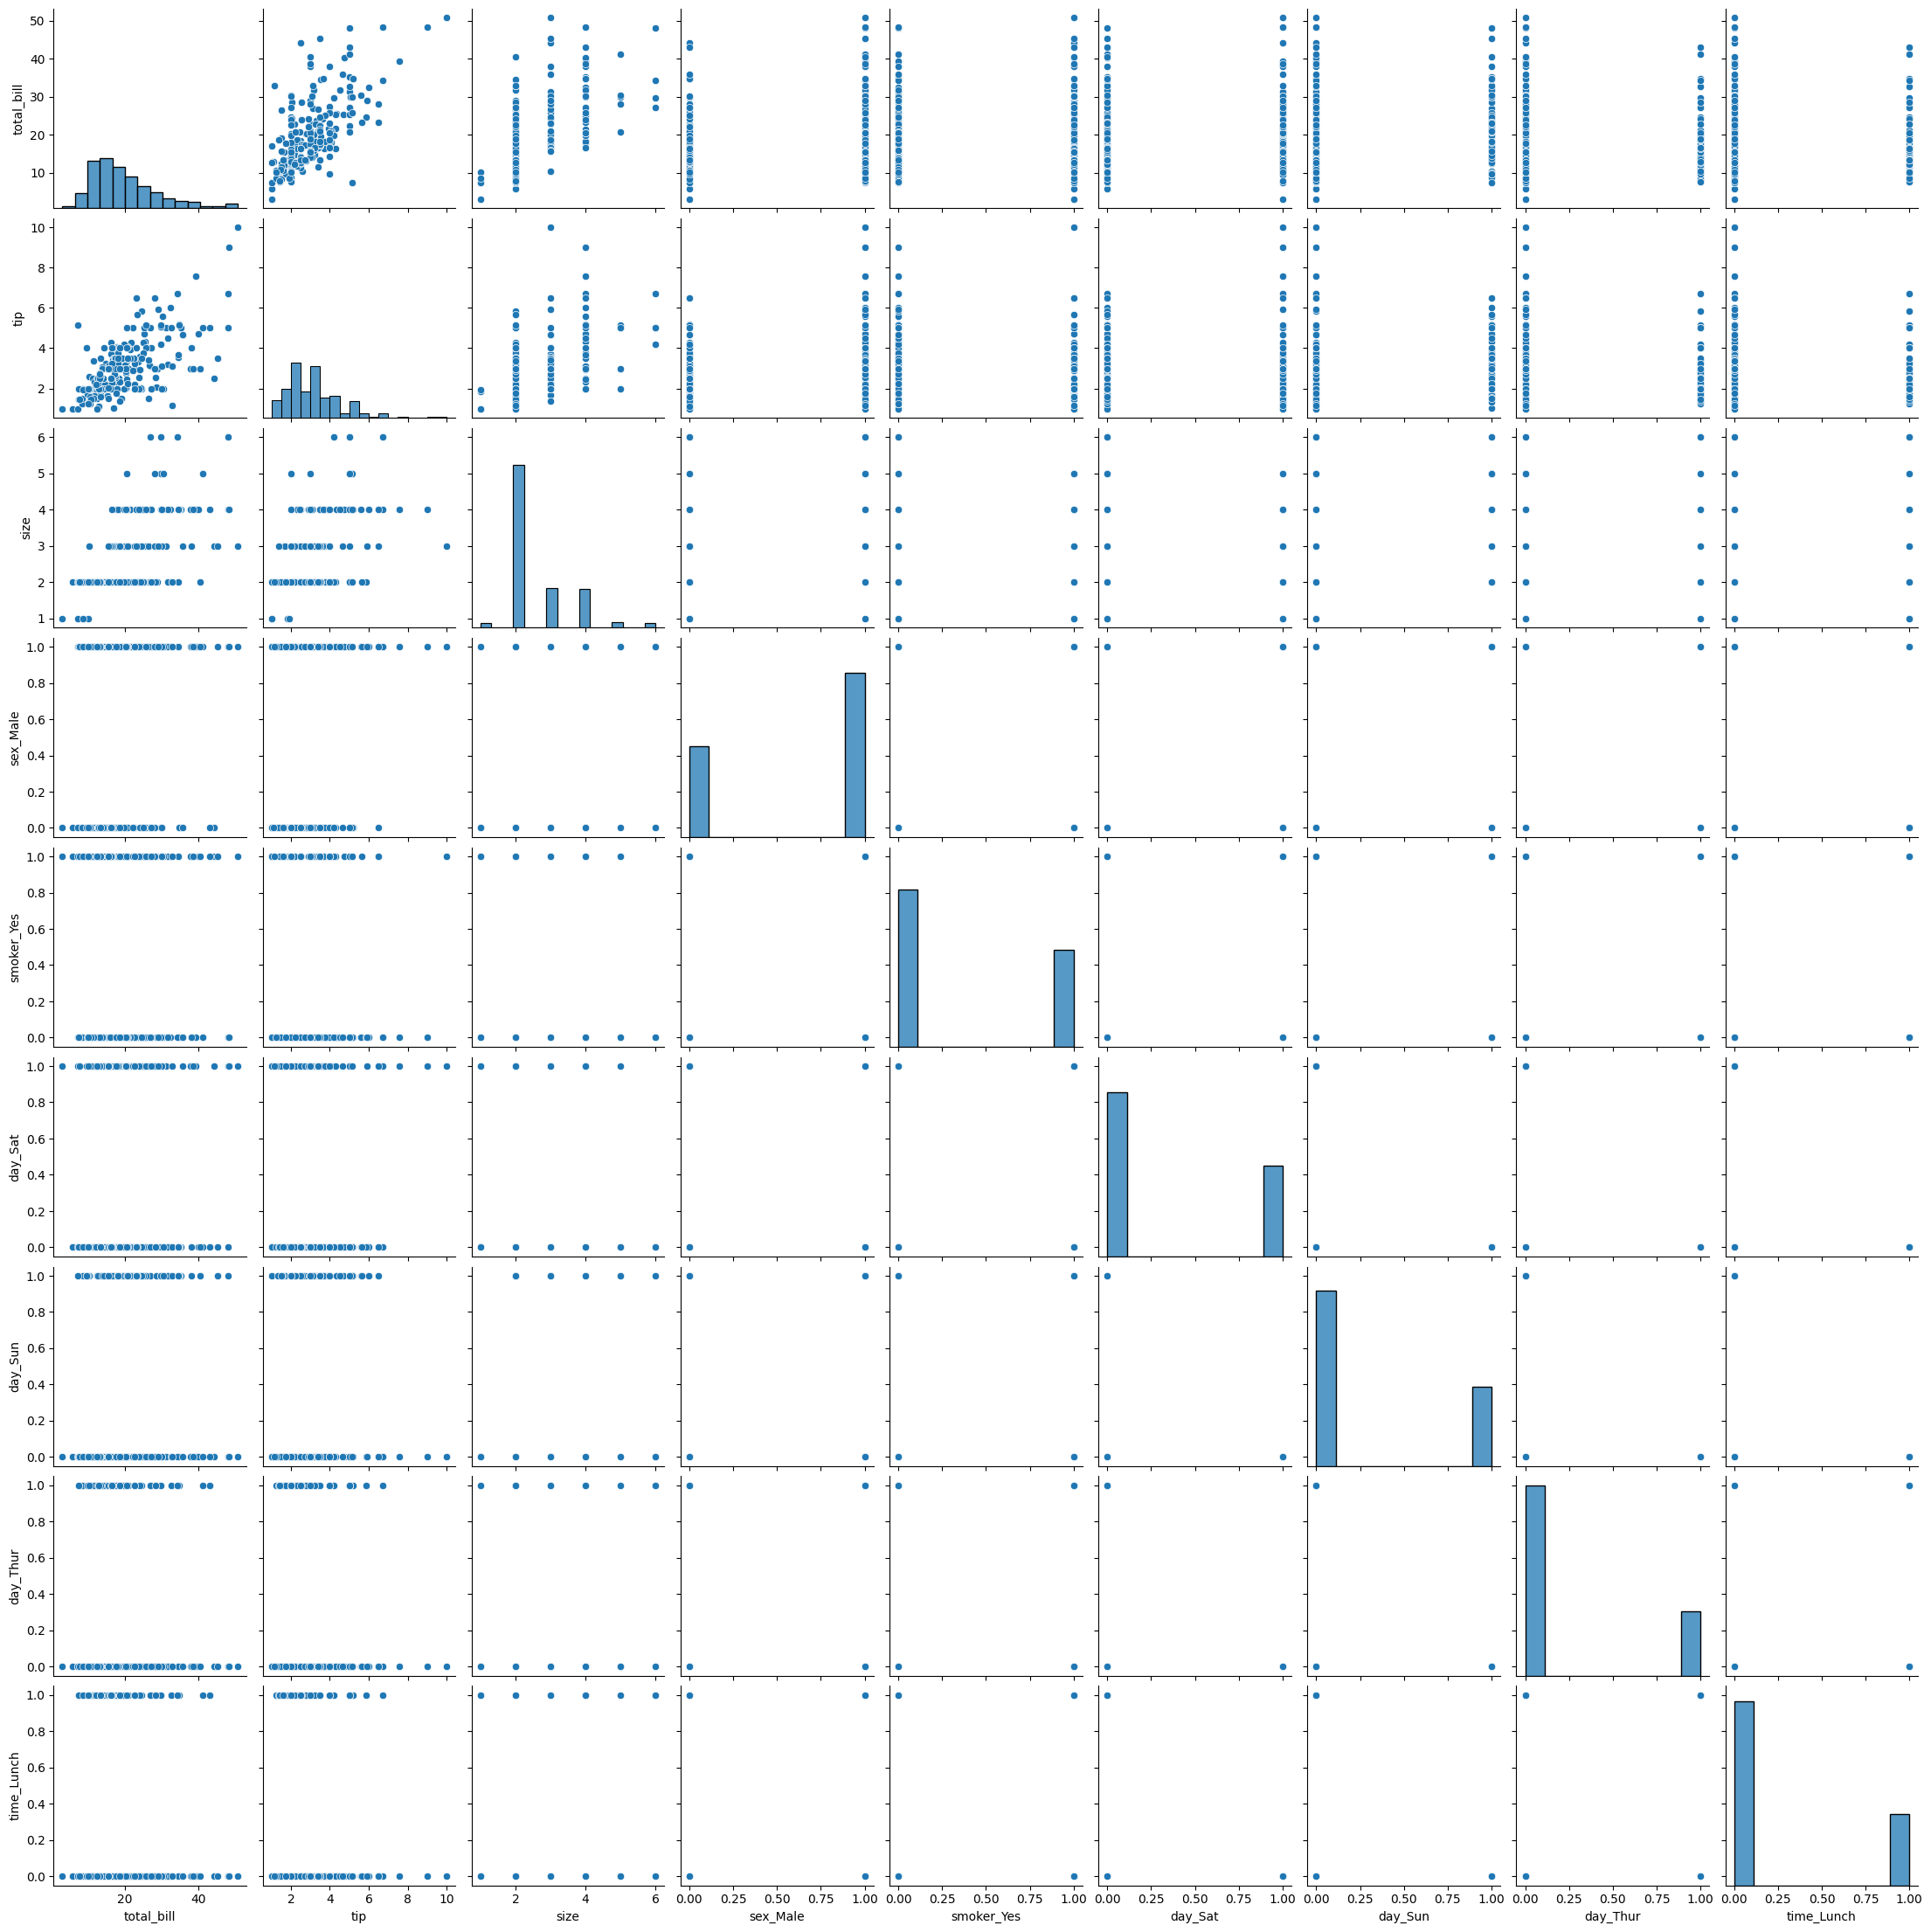

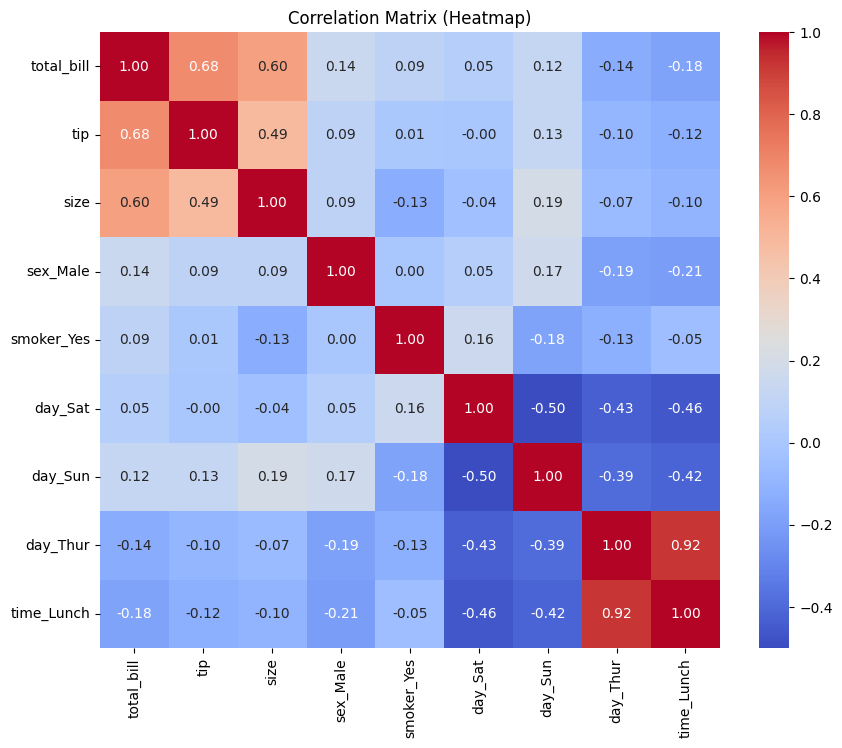

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'C:\Users\panda\Downloads\SEM3\Data science\tips (data for regression problem).csv')

# Encode categorical variables and scale numeric columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = df_encoded.drop(columns=['tip'])
y = df_encoded['tip']
scaler = StandardScaler()
X[['total_bill', 'size']] = scaler.fit_transform(X[['total_bill', 'size']])

# Scatter plot for each feature vs target
for column in X.columns:
    plt.figure()
    sns.scatterplot(data=df_encoded, x=column, y='tip')
    plt.title(f'Scatter Plot: {column} vs Tip')
    plt.show()

# Pair plot for multiple features
sns.pairplot(df_encoded)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Heatmap)")
plt.show()



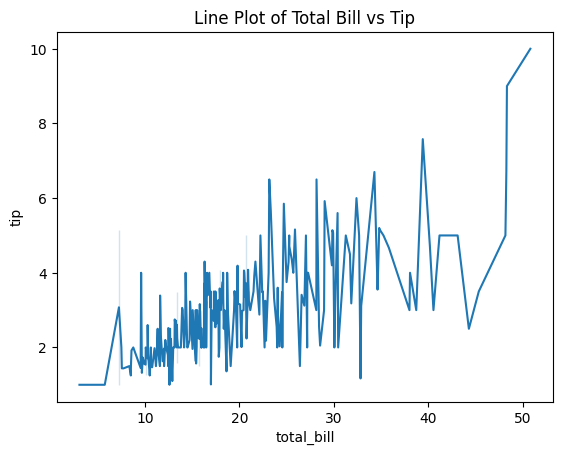

In [16]:


plt.figure()
sns.lineplot(data=df_encoded, x='total_bill', y='tip')
plt.title("Line Plot of Total Bill vs Tip")
plt.show()



In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'C:\Users\panda\Downloads\SEM3\Data science\tips (data for regression problem).csv')

# Encode categorical variables and scale numeric columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
X = df_encoded.drop(columns=['tip'])
y = df_encoded['tip']

# Scale numeric columns
scaler = StandardScaler()
X[['total_bill', 'size']] = scaler.fit_transform(X[['total_bill', 'size']])

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Check for and replace any non-finite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
y = y.replace([np.inf, -np.inf], np.nan).fillna(0)

# Convert to numpy arrays of type float
X_np = X.to_numpy().astype(float)
y_np = y.to_numpy().astype(float)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Rainbow test for linearity
try:
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    rainbow_stat, rainbow_p_val = linear_rainbow(model)
    print(f"Rainbow test statistic: {rainbow_stat}")
    print(f"Rainbow test p-value: {rainbow_p_val}")
    if rainbow_p_val > 0.05:
        print("No significant deviation from linearity (p > 0.05).")
    else:
        print("Significant deviation from linearity (p <= 0.05).")
except Exception as e:
    print(f"An error occurred: {e}")


Rainbow test statistic: 1.5493994941797338
Rainbow test p-value: 0.01864740855312329
Significant deviation from linearity (p <= 0.05).
